In [5]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf as pdf
import matplotlib.patches as pch
import colors as EL

In [6]:
savename = "./figures/S0_starved.pdf"
df = pd.read_csv('./data/experiment_IDs/cleaned_static_data.csv')
odors = df.treatment_odor.unique().tolist()
odorkey = ['Water', 'Quinine', 'Food']
species = df.species.unique().tolist()

display(odors)
display(species)
colors = [EL.aegypti, EL.albopictus, EL.arabiensis, EL.coluzzii, EL.culex_q, EL.culex_t]

['100ul_milliQ_water', '100ul_quinine', '05_percent_food']

['Aedes aegypti',
 'Aedes albopictus',
 'Anopheles arabiensis',
 'Anopheles gambiae',
 'Culex quinquefasciatus',
 'Culex tarsalis']

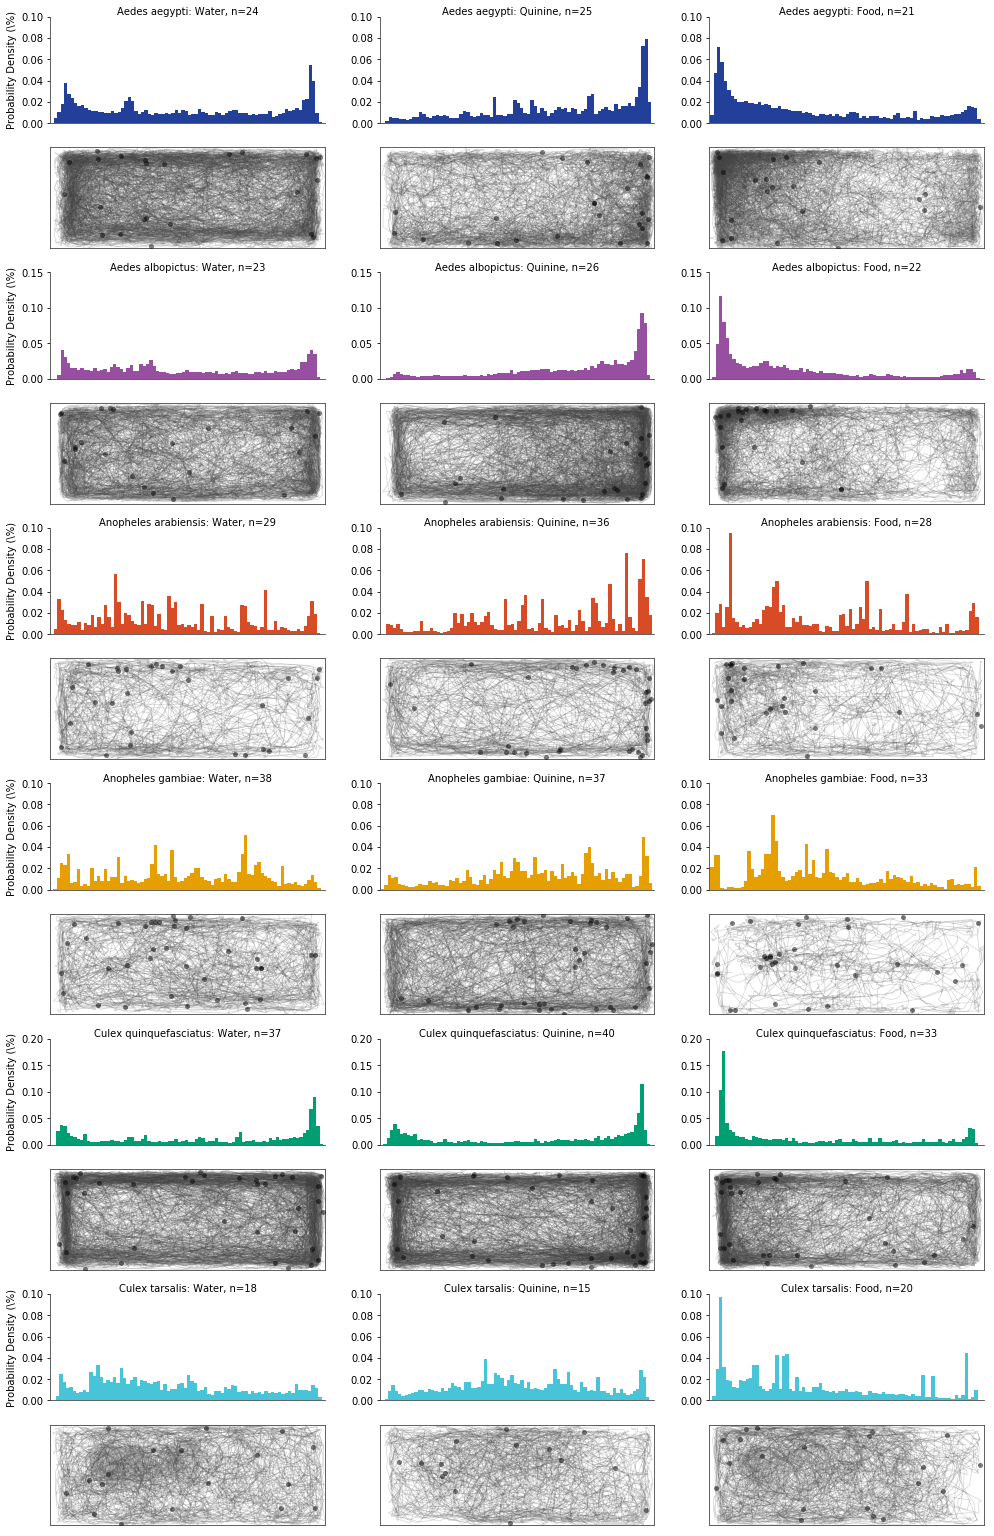

In [13]:
fig = plt.figure(figsize=(14, 2+15.5*4.125/3))
vlims = [0.1, 0.15, 0.1, 0.1, 0.2, 0.1]

for i, specie in enumerate(species):
    color = colors[i]
    vlim = vlims[i]
    for xx, odor in enumerate(odors):
        histax = fig.add_subplot(13, 3, (2*i)*3+xx+1)
        ax = fig.add_subplot(13, 3, (2*i+1)*3+xx+1, aspect="equal")
        ax.set_xlim(0, 80-1)
        ax.set_ylim(30-1, 0)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.spines['bottom'].set_color(EL.c_greyax)
        ax.spines['top'].set_color(EL.c_greyax) 
        ax.spines['right'].set_color(EL.c_greyax)
        ax.spines['left'].set_color(EL.c_greyax)

        xlist = []
        temp = df[df['species'] == specie]
        temp = temp[temp['treatment_odor'] == odor].copy()
        
        for ii, row in temp.iterrows(): 
            name = row['animal_ID'] #'190808-04-E-bottom'
            pos = name.split('-')[-1]
            date = name.split('-')[0]
            num = name.split('-')[1]
            fname = './data/trajectories/video_calculations/'+date+'-'+num+'-E-'+pos+'.csv'
            temp2 = pd.read_csv(fname)
            x = temp2["pos_x_mm"].values
            y = temp2["pos_y_mm"].values
            xlist += x.tolist()
            ax.plot(x, y, lw=0.75, color=EL.c_greyax, alpha=0.2)
            ax.scatter([x[-1]], [y[-1]], color="k", alpha=0.5, lw=0, s=25, zorder=20)
        histax.set_xlim(0, 80)
        histax.set_ylim(0, vlim)
        histax.set_xticklabels([])
        histax.set_xticks([])
        histax.text(40, vlim, specie + ': ' + odorkey[xx]+', n='+str(len(temp)), 
                    ha='center', va='bottom', clip_on=False)
        histax.hist(xlist, bins=80, color=color, density=True, lw=0, clip_on=False)
        
        # histax.set_xlabel("Arena location (mm, 0-80)")
        if odor == '100ul_milliQ_water':
            histax.set_ylabel("Probability Density (\%)")
        histax.spines['top'].set_visible(False)
        histax.spines['right'].set_visible(False)
        histax.spines['left'].set_color(EL.c_greyax)
        histax.spines['bottom'].set_color(EL.c_greyax)

# SET BOUNDARIES AND SAVE FIGURE -----------------------------------------------
plt.tight_layout()
fig.subplots_adjust(wspace=0.2, hspace=0.2)

# Save the Matplotlib figure as a PDF file:
plt.show()
pp = pdf.PdfPages(savename, keep_empty=False)
pp.savefig(fig)
pp.close()